In [1]:
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt

# Enseble Learning

In [129]:
# -> A group of predictors is called an ensemble. 
# -> The technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method.
# -> Voting classifiers: 1. Hard Voting and 2. Soft voting
# -> A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the 
# class that gets the most votes. This majority-vote classifier is called a hard voting classifier

## Voting Classifiers

### Hard Voting Classifier

In [3]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
coin_tosses

array([[1, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 0, 1],
       ...,
       [0, 1, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 1, 1]])

In [5]:
np.cumsum(coin_tosses, axis=0)

array([[   1,    0,    1, ...,    0,    0,    1],
       [   1,    0,    2, ...,    1,    0,    1],
       [   1,    1,    3, ...,    2,    0,    2],
       ...,
       [5042, 5151, 5110, ..., 5082, 5089, 5087],
       [5043, 5151, 5111, ..., 5082, 5090, 5088],
       [5043, 5152, 5111, ..., 5083, 5091, 5089]])

In [6]:
np.arange(1, 10001).reshape(-1, 1)

array([[    1],
       [    2],
       [    3],
       ...,
       [ 9998],
       [ 9999],
       [10000]])

In [4]:
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)
cumulative_heads_ratio

array([[1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 1.        , ..., 0.5       , 0.        ,
        0.5       ],
       [0.33333333, 0.33333333, 1.        , ..., 0.66666667, 0.        ,
        0.66666667],
       ...,
       [0.50430086, 0.51520304, 0.51110222, ..., 0.50830166, 0.5090018 ,
        0.50880176],
       [0.50435044, 0.51515152, 0.51115112, ..., 0.50825083, 0.50905091,
        0.50885089],
       [0.5043    , 0.5152    , 0.5111    , ..., 0.5083    , 0.5091    ,
        0.5089    ]])

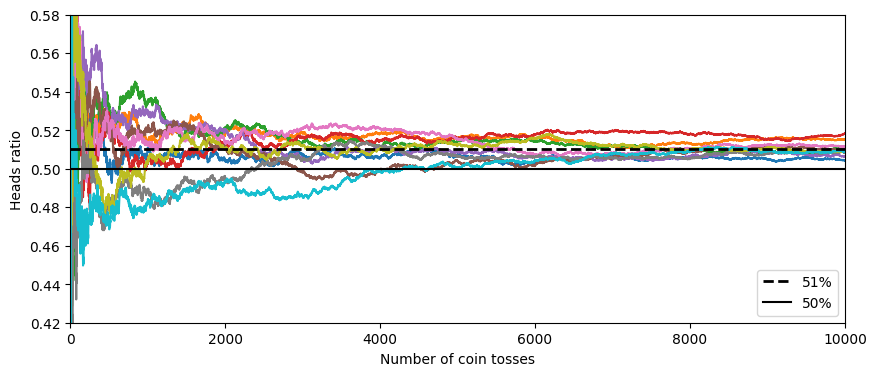

In [12]:
# this graph just represents the relationship between no of instances and probaility.
# as no of instances increases irrespective of probability many instances fall under the more probablity one.
# here we set probability of heads = 0.51 as we can see that as we increase no of instances the probability curve approaces the
# dashed line (y = 0.51)

plt.figure(figsize = (10, 4))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.show()

In [29]:
# loading moons dataset

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 500, noise = .3, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(375, 2) (125, 2) (375,) (125,)


In [30]:
# hard voting on moons datset

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

rnd_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
lg_clf = LogisticRegression(solver = "lbfgs", random_state = 42)
svm_clf = SVC(gamma = "scale", random_state = 42)

vtng_clf = VotingClassifier(
    estimators = [('lr', lg_clf), ('rc', rnd_clf), ('sc', svm_clf)], 
    voting = "hard"
)

vtng_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rc', RandomForestClassifier(random_state=42)),
                             ('sc', SVC(random_state=42))])

In [31]:
from sklearn.metrics import accuracy_score

classifiers = [rnd_clf, lg_clf, svm_clf, vtng_clf]

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score( y_pred, y_test))

RandomForestClassifier 0.896
LogisticRegression 0.864
SVC 0.896
VotingClassifier 0.912


### Soft Voting Classifier

In [37]:
# soft voting on moons datset

lg_clf = LogisticRegression(solver = "lbfgs", random_state = 42)
rnd_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
svm_clf = SVC(gamma = "scale", probability = True, random_state = 42)

vtng_clf = VotingClassifier(
    estimators =[('lc', lg_clf), ('rc', rnd_clf), ('sc', svm_clf)],
    voting = "soft"
)

In [38]:
from sklearn.metrics import accuracy_score

classifiers = [rnd_clf, lg_clf, svm_clf, vtng_clf]

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score( y_pred, y_test))

RandomForestClassifier 0.896
LogisticRegression 0.864
SVC 0.896
VotingClassifier 0.92


## Bagging and Pasting

In [40]:
# bagging classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bgng_clf = BaggingClassifier(
    DecisionTreeClassifier(), max_samples = 100, n_estimators = 500, bootstrap = True, random_state = 42
)

bgng_clf.fit(X_train, y_train)
y_predict = bgng_clf.predict(X_test)

print(bgng_clf.__class__.__name__, accuracy_score(y_predict, y_test))

BaggingClassifier 0.904


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 42)
dt_clf.fit(X_train, y_train)
y_predict = dt_clf.predict(X_test)

print(dt_clf.__class__.__name__, accuracy_score(y_predict, y_test))

DecisionTreeClassifier 0.856


In [123]:
# comparision of how the normal decision tree classifier regularizes over ensemble method

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

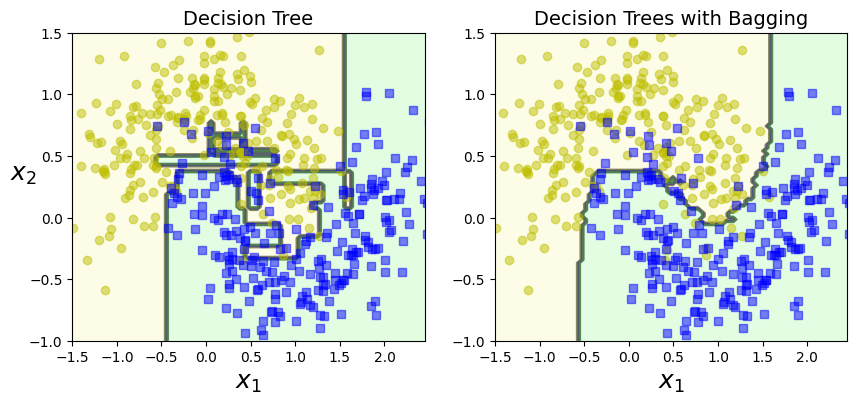

In [124]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
plt.sca(axes[0])
plot_decision_boundary(dt_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bgng_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

## Out of Bag Evaluation

In [125]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

In [127]:
bag_clf.oob_decision_function_[:5]

array([[0.32275132, 0.67724868],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [128]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

## Random Forests

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rdn_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, random_state = 42, n_jobs = -1)
rdn_clf.fit(X_train, y_train)
y_predict = rdn_clf.predict(X_test)

print(rdn_clf.__class__.__name__, accuracy_score(y_test, y_predict))

RandomForestClassifier 0.912


In [136]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

rdn_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter = "random", max_leaf_nodes = 16),
    n_estimators = 500, random_state = 42, n_jobs = -1, bootstrap = True, max_samples = 1.0
)
rdn_clf.fit(X_train, y_train)
y_predict = rdn_clf.predict(X_test)

print(rdn_clf.__class__.__name__, accuracy_score(y_test, y_predict))


# baggingclassifier is very similar to random forest classifier

BaggingClassifier 0.92


## Feature Importance

In [144]:
# randome forests make it easy to measure the importance of the feature

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

rdn_clf = RandomForestClassifier(n_estimators = 500, random_state = 42, n_jobs = -1)
rdn_clf.fit(X, y)

for name,score in zip(iris.feature_names, rdn_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [146]:
# feature importances were caluculated in such a way that their sum equals 1

np.sum(rdn_clf.feature_importances_)

1.0

In [154]:
# getting to know which feature are very important in MNIST dataset

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1, parser = "auto")

X = mnist.data
y = mnist.target

rdn_clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1, random_state = 42)
rdn_clf.fit(X, y)

rdn_clf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.65959666e-07, 1.10097657e-07, 1.24121201e-07, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.29752932e-08, 7.14046307e-07, 1.02907079e-06,
       1.36929660e-06, 1.84151457e-06, 1.97077475e-06, 3.25746020e-06,
       3.05553127e-06, 4.04239610e-06, 3.07671197e-06, 4.86614704e-06,
       4.30995883e-06, 2.05782701e-06, 6.07973485e-07, 9.60132953e-07,
       9.25182498e-07, 7.88034895e-07, 6.46002516e-07, 5.60787760e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

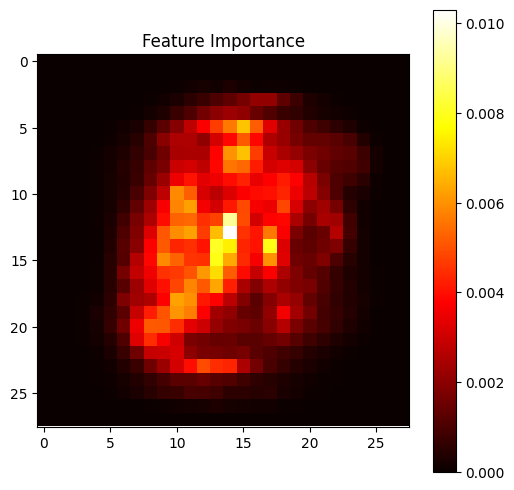

In [161]:
import matplotlib.pyplot as plt


image = rdn_clf.feature_importances_.reshape(28, 28)

plt.figure(figsize=(6,6))
plt.imshow(image, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Feature Importance")
plt.show()

In [159]:
X.shape

(70000, 784)

## Boosting
### AdaBoost

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [165]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

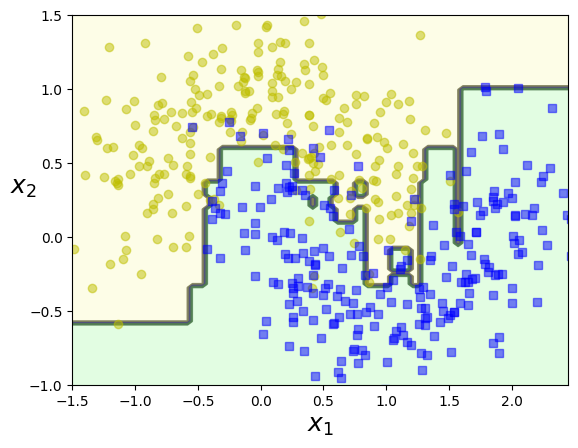

In [166]:
plot_decision_boundary(ada_clf, X, y)

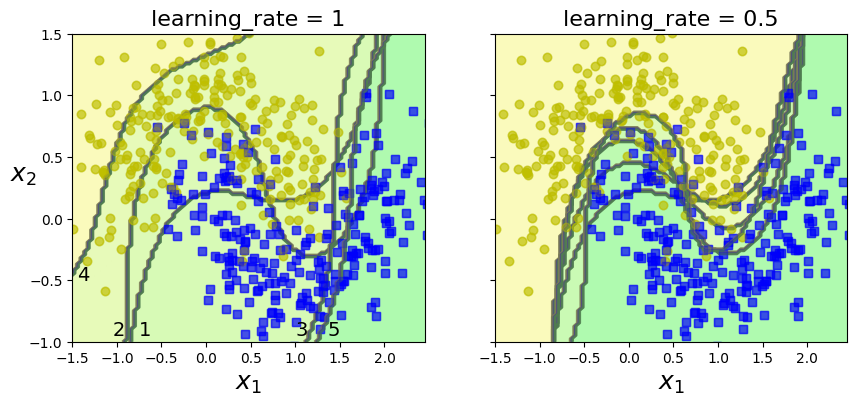

In [168]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        r = sample_weights[y_pred != y_train].sum() / sample_weights.sum() 
        alpha = learning_rate * np.log((1 - r) / r) 
        sample_weights[y_pred != y_train] *= np.exp(alpha) 
        sample_weights /= sample_weights.sum()

        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=14)
        plt.text(-1.05, -0.95, "2", fontsize=14)
        plt.text(1.0, -0.95, "3", fontsize=14)
        plt.text(-1.45, -0.5, "4", fontsize=14)
        plt.text(1.36,  -0.95, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

### Gradient Boosting

In [169]:
# creating a random quadratic dataset

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [170]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [171]:
# fitting leftovers

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [172]:
# fitting leftovers

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [173]:
X_new = np.array([[0.8]])

In [175]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

y_pred

array([0.75026781])

In [176]:
# figures representing how the above classifiers learn at each stage

def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

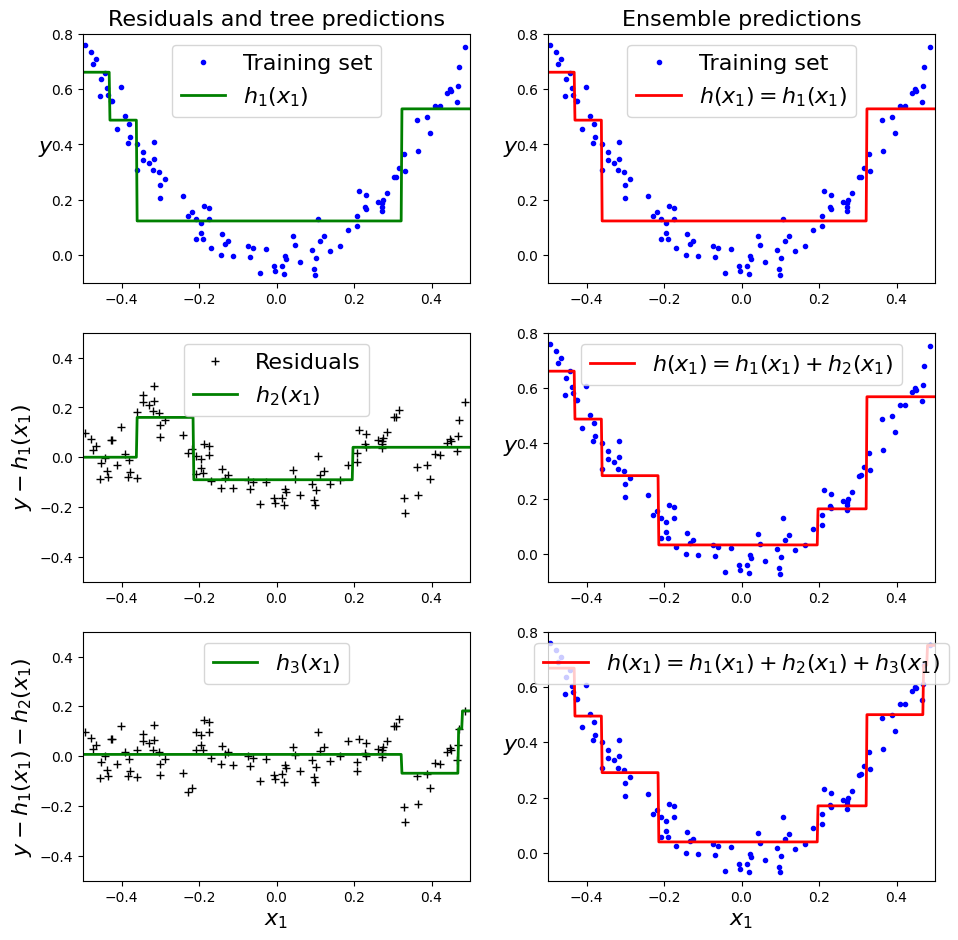

In [177]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

### Gradient Boosting Regressor

In [178]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [179]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

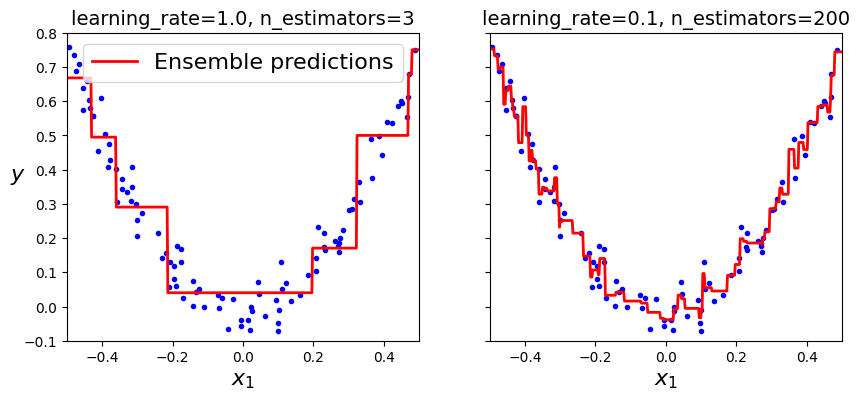

In [180]:
# figures comapring learning at different rates

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

### Early Stopping(Gradient Boosting)

In [181]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

In [183]:
min_error = np.min(errors)

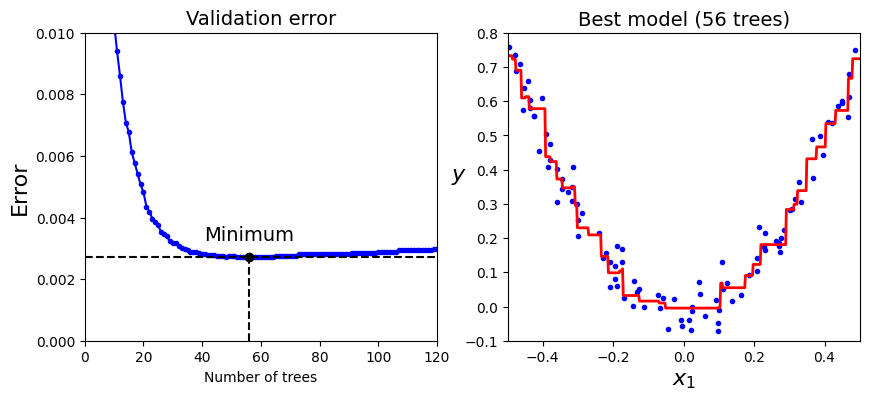

In [184]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(np.arange(1, len(errors) + 1), errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

In [185]:
# Early stopping with some patience (interrupts training only after there's no improvement for 5 epochs):

gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [186]:
print(gbrt.n_estimators)

61


In [188]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.002712853325235463


## XGBoost

In [189]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

Error: the xgboost library is not installed.


In [190]:
!pip3 install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 217.9 kB/s eta 0:07:38
   ---------------------------------------- 0.1/99.8 MB 365.7 kB/s eta 0:04:33
   ---------------------------------------- 0.1/99.8 MB 605.3 kB/s eta 0:02:45
   ---------------------------------------- 0.3/99.8 MB 1.1 MB/s eta 0:01:28
   ---------------------------------------- 0.5/99.8 MB 1.7 MB/s eta 0:00:58
   ---------------------------------------- 0.7/99.8 MB 2.2 MB/s eta 0:00:45
   ---------------------------------------- 1.0/99.8 MB 2.6 MB/s eta 0:00:38
    ------------------------------------

In [191]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [192]:
if xgboost is not None:  
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred) 
    print("Validation MSE:", val_error)     

Validation MSE: 0.004644479346317078


In [193]:
if xgboost is not None:  
    xgb_reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)  
    print("Validation MSE:", val_error)     

[0]	validation_0-rmse:0.15232
[1]	validation_0-rmse:0.10690
[2]	validation_0-rmse:0.07868
[3]	validation_0-rmse:0.06385
[4]	validation_0-rmse:0.05656
[5]	validation_0-rmse:0.05486
[6]	validation_0-rmse:0.05394
[7]	validation_0-rmse:0.05556
Validation MSE: 0.0029091166440151123


C:\Users\91934\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [194]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None

61.9 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [195]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

88.9 ms ± 2.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Stacking